<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/Bland_Altman_ROC_curve_SIA_cal_regression_magnitude_axis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/drive/MyDrive/app and calc SIA magnitude dr aishwarya Raj (1).xlsx')



In [ ]:
df.shape

(107, 2)

In [ ]:
df.columns

Index(['app_magnitude', 'calc_magnitude'], dtype='object')

In [ ]:
df.describe()

,app_magnitude,calc_magnitude
count,107.000000,107.000000
mean,1.314382,1.490467
std,1.638689,1.096741
min,0.000000,0.170000
25%,0.353500,0.785000
50%,0.870000,1.260000
75%,1.580000,1.865000
max,9.000000,6.530000


In [98]:
df.corr()

,app_magnitude,calc_magnitude
app_magnitude,1.00000,0.37748
calc_magnitude,0.37748,1.00000


<Axes: >

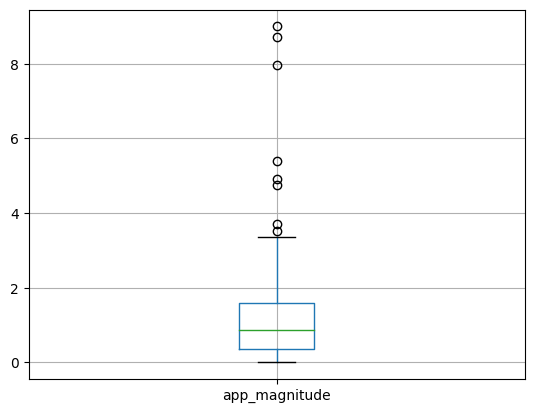

In [34]:
df.boxplot('app_magnitude')

<ipython-input-70-9e556a5efc89>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1= df[df['app_magnitude']<2.71] [df['calc_magnitude']<2.71]


<Axes: >

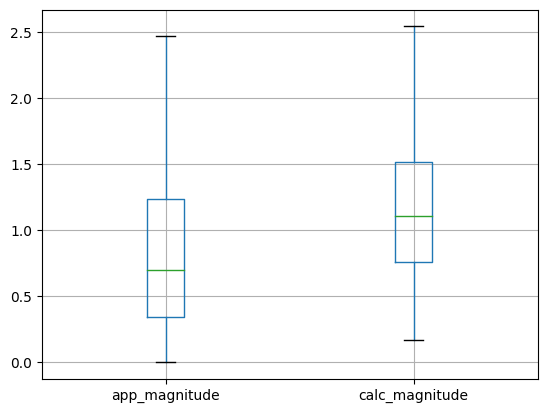

In [70]:
df1= df[df['app_magnitude']<2.71] [df['calc_magnitude']<2.71]
df1.shape
df1.boxplot()

In [71]:
df1.shape

(87, 2)

array([[<Axes: title={'center': 'app_magnitude'}>,
        <Axes: title={'center': 'calc_magnitude'}>]], dtype=object)

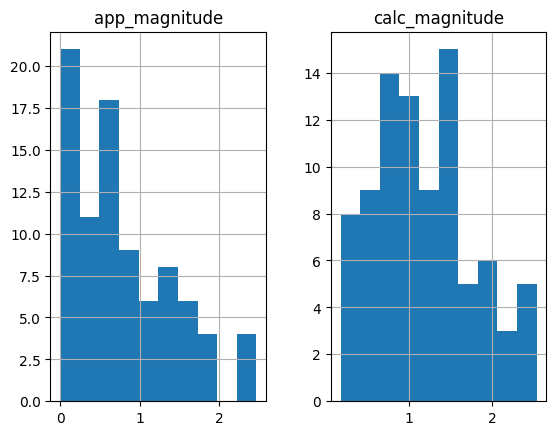

In [72]:
df1.hist()

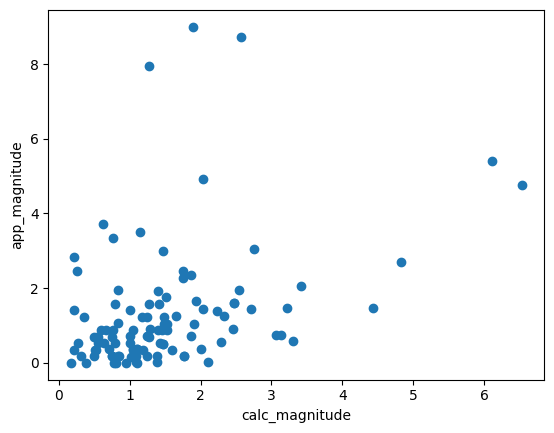

In [99]:
import matplotlib.pyplot as plt
y = df['app_magnitude']
x = df['calc_magnitude']
plt.ylabel('app_magnitude')
plt.xlabel('calc_magnitude')
plt.scatter(x,y)

In [102]:
x = df.drop(['app_magnitude'], axis=1)
y = df['app_magnitude']

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)



In [104]:
from sklearn.linear_model import LinearRegression
linearmodel = LinearRegression()
linearmodel.fit(x_train, y_train)

LinearRegression()

In [105]:
y_pred = linearmodel.predict(x_test)
y_pred

array([0.90735414, 0.92205586, 1.53952805, 1.39741143, 2.71076497,
       1.2405931 , 0.81424326, 1.07397362, 1.46601945, 1.07397362,
       1.12297935, 2.0736905 , 1.03966961, 0.94655873, 0.90735414,
       1.26509597, 1.53952805, 0.78483982, 1.79925841, 2.11779565,
       0.77993925, 0.72603295, 1.02986847, 0.67212664, 1.66204237,
       1.26019539, 1.45131774, 1.40721258, 1.27979768, 1.26999654,
       1.45621831, 0.92695644, 0.78974039])

In [106]:
y_test.values

array([1.780e-01, 2.900e-03, 1.430e+00, 2.470e+00, 1.470e+00, 5.300e-01,
       5.300e-01, 1.800e-01, 9.000e+00, 1.900e-02, 3.500e-01, 7.540e-01,
       1.680e-01, 1.945e+00, 7.000e-01, 1.236e+00, 4.920e+00, 7.000e-01,
       8.720e+00, 1.456e+00, 1.700e-01, 0.000e+00, 7.070e-01, 5.300e-01,
       5.500e-01, 5.100e-01, 7.300e-01, 1.920e-01, 1.752e+00, 1.050e+00,
       2.349e+00, 5.300e-01, 3.500e-01])

In [107]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1024458551571199

In [108]:
from sklearn.ensemble import RandomForestRegressor
forestmodel = RandomForestRegressor()
forestmodel.fit(x_train, y_train)

RandomForestRegressor()

In [109]:
foresty_pred = forestmodel.predict(x_test)

In [110]:
r2_score(y_test, foresty_pred)

-0.0033331580265023586

In [111]:
from sklearn.tree import DecisionTreeRegressor
treemodel = DecisionTreeRegressor()
treemodel.fit(x_train, y_train)

DecisionTreeRegressor()

In [112]:
treey_pred = treemodel.predict(x_test)
r2_score(y_test, treey_pred)

-0.01756363977269726

In [113]:
data1=df['app_magnitude']
data2=df['calc_magnitude']

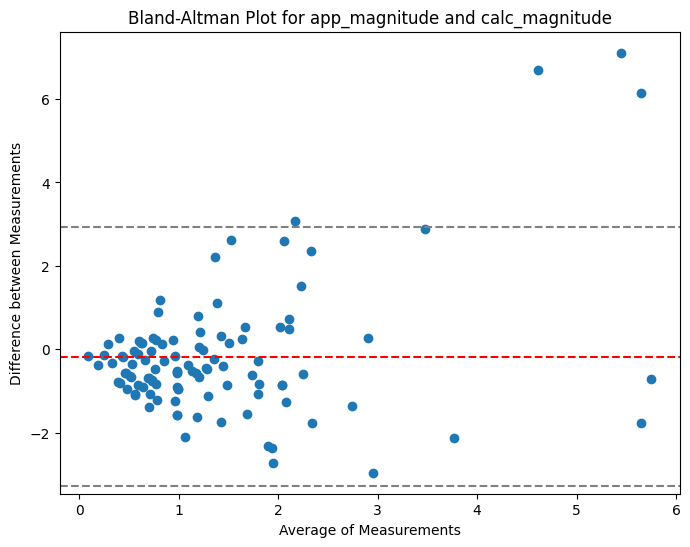

In [114]:

import numpy as np
import matplotlib.pyplot as plt


def bland_altman_plot(data1, data2, *args, **kwargs):
    """
    Bland-Altman plot function.

    data1 : 1D array-like
        First set of measurements.
    data2 : 1D array-like
        Second set of measurements.
    """
    data1 = np.asarray(data1)
    data2 = np.asarray(data2)

    # Compute the differences between data1 and data2
    differences = data1 - data2

    # Compute the average of the measurements
    averages = (data1 + data2) / 2.0

    # Create the Bland-Altman plot
    plt.figure(figsize=(8, 6))
    plt.scatter(averages, differences, *args, **kwargs)

    # Add a horizontal line at the mean of the differences
    plt.axhline(differences.mean(), color='red', linestyle='--')

    # Add limits and labels
    mean_difference = differences.mean()
    sd_difference = differences.std()
    plt.title('Bland-Altman Plot for app_magnitude and calc_magnitude')
    plt.xlabel('Average of Measurements')
    plt.ylabel('Difference between Measurements')
    plt.axhline(mean_difference + 1.96 * sd_difference, color='gray', linestyle='--')
    plt.axhline(mean_difference - 1.96 * sd_difference, color='gray', linestyle='--')

    # Show plot
    plt.show()

bland_altman_plot(data1, data2)

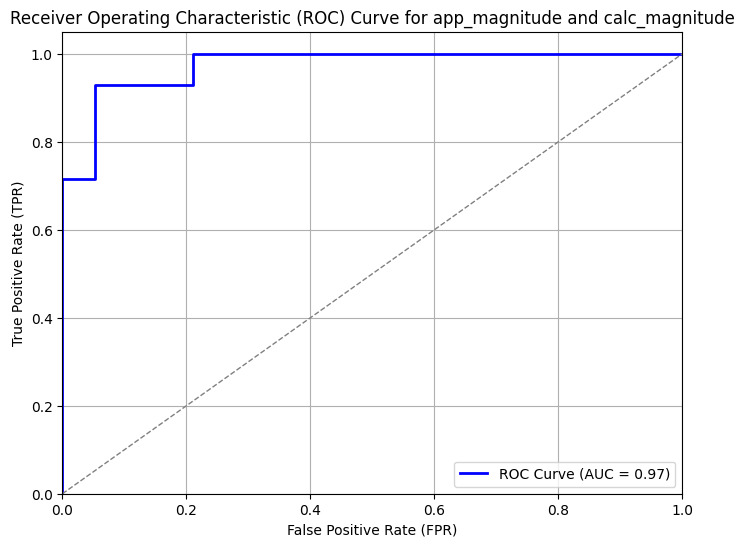

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score


X = df['calc_magnitude']
y = df['app_magnitude']
X, y = make_classification(n_samples=107,random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities of the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Plot the random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for app_magnitude and calc_magnitude')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
